In [43]:
import pandas as pd
import numpy as np

from tqdm import tqdm
from PIL import Image

In [2]:
from game_assets.utils import simplify_image, save_img
from conv_rgb.model import ConvRGB

In [6]:
from pysimulacra.data import SimulacraData

ds = SimulacraData('../raw_data/sac_public_2022_06_29.sqlite')

data = ds.fetch_all_data()

Table : col1, col2, col3, ...
----------
survey  :  id, qid, rating
generations  :  id, sid, method, prompt, verified
images  :  id, gid, idx
paths  :  iid, path
ratings  :  sid, iid, rating, verified
upscales  :  iid, method


In [ ]:
'raw_data/sac-000000'

In [ ]:
# 'simulacra-aesthetic-captions'

In [16]:
img_df = ds.get_image_paths_and_prompts()

In [17]:
def shorten_path(img_path):
    name_parts = img_path.split('_')
    new_name = f'{name_parts[0]}_{name_parts[-1]}'
    return new_name

In [18]:
img_df['short_img_path'] = img_df.img_path.apply(shorten_path)

In [26]:
import regex as re
import string

def clean_png_path(file_name):
    
    suffix = file_name[-4:]
    
    clean_file_name = re.sub(r'[^A-Za-z0-9 ]+', '', file_name)
    
    return '_'.join(clean_file_name.split()) + suffix
    

# def clean_png_path(file_name):
    
#     clean_file_name = ''.join([char for char in file_name[:-4] if char not in string.punctuation])
    
#     return '_'.join(clean_file_name.split()) + suffix # remove multiple whitespace

    

In [33]:
img_df

,img_id,gen_prompt,img_path,short_img_path
0,1,An artwork of a broken wine bottle in the medi...,0_An_artwork_of_a_broken_wine_bottle_in_the_me...,0_1.png
1,2,An artwork of a broken wine bottle in the medi...,0_An_artwork_of_a_broken_wine_bottle_in_the_me...,0_2.png
2,3,An artwork of a broken wine bottle in the medi...,0_An_artwork_of_a_broken_wine_bottle_in_the_me...,0_3.png
3,4,An artwork of a broken wine bottle in the medi...,0_An_artwork_of_a_broken_wine_bottle_in_the_me...,0_4.png
4,5,An artwork of a broken wine bottle in the medi...,0_An_artwork_of_a_broken_wine_bottle_in_the_me...,0_5.png
...,...,...,...,...
238887,248440,beautiful portrait of a smiling flame witch ho...,43043_beautiful_portrait_of_a_smiling_flame_wi...,43043_4.png
238888,248441,avatar of a dragon knight anato finnstark yosi...,43044_avatar_of_a_dragon_knight_anato_finnstar...,43044_1.png
238889,248442,avatar of a dragon knight anato finnstark yosi...,43044_avatar_of_a_dragon_knight_anato_finnstar...,43044_2.png
238890,248443,avatar of a dragon knight anato finnstark yosi...,43044_avatar_of_a_dragon_knight_anato_finnstar...,43044_3.png


In [34]:
img_df['clean_prompt'] = img_df.gen_prompt.apply(clean_png_path)

In [5]:
# https://github.com/google-research-datasets/conceptual-captions/blob/master/LICENSE
# https://ai.google.com/research/ConceptualCaptions/download

# data = pd.read_csv('../raw_data/Validation_GCC-1.1.0-Validation.tsv', sep = '\t', header = None)
# data.columns = ['caption', 'url']

In [31]:
import torch
import clip

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


def clip_encode_image(pil_img):
    
    device = "cuda" if torch.cuda.is_available() else "cpu"
    
    image = preprocess(pil_img).unsqueeze(0).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image)

    return image_features


In [47]:
colour_model = ConvRGB(input_shape = (128, 128), n_cut = 5)

In [48]:
def colour_encode_image(pil_img):
    
    img = pil_img.resize(128, 128)
    
    colour_features = colour_model(img)
    
    return colour_features

In [46]:
import os
all_imgs = os.listdir('../raw_data/sac-000000/')

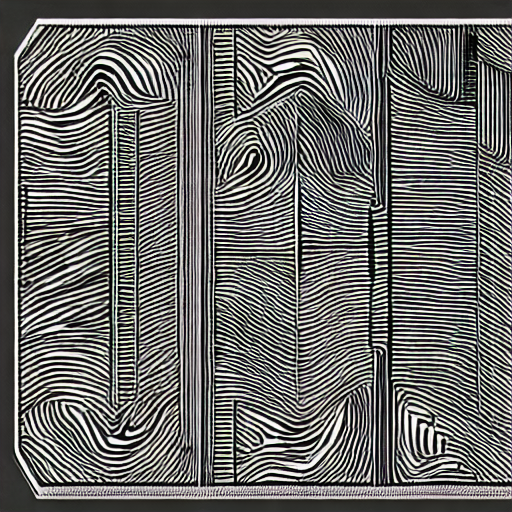

In [44]:
Image.open('../raw_data/sac-000000/25308_2.png')

In [ ]:
../raw_data/sac-000000/{row['url']}

In [ ]:
colour_encode_image()

In [51]:
img_df

,img_id,gen_prompt,img_path,short_img_path,clean_prompt
0,1,An artwork of a broken wine bottle in the medi...,0_An_artwork_of_a_broken_wine_bottle_in_the_me...,0_1.png,An_artwork_of_a_broken_wine_bottle_in_the_medi...
1,2,An artwork of a broken wine bottle in the medi...,0_An_artwork_of_a_broken_wine_bottle_in_the_me...,0_2.png,An_artwork_of_a_broken_wine_bottle_in_the_medi...
2,3,An artwork of a broken wine bottle in the medi...,0_An_artwork_of_a_broken_wine_bottle_in_the_me...,0_3.png,An_artwork_of_a_broken_wine_bottle_in_the_medi...
3,4,An artwork of a broken wine bottle in the medi...,0_An_artwork_of_a_broken_wine_bottle_in_the_me...,0_4.png,An_artwork_of_a_broken_wine_bottle_in_the_medi...
4,5,An artwork of a broken wine bottle in the medi...,0_An_artwork_of_a_broken_wine_bottle_in_the_me...,0_5.png,An_artwork_of_a_broken_wine_bottle_in_the_medi...
...,...,...,...,...,...
238887,248440,beautiful portrait of a smiling flame witch ho...,43043_beautiful_portrait_of_a_smiling_flame_wi...,43043_4.png,beautiful_portrait_of_a_smiling_flame_witch_ho...
238888,248441,avatar of a dragon knight anato finnstark yosi...,43044_avatar_of_a_dragon_knight_anato_finnstar...,43044_1.png,avatar_of_a_dragon_knight_anato_finnstark_yosi...
238889,248442,avatar of a dragon knight anato finnstark yosi...,43044_avatar_of_a_dragon_knight_anato_finnstar...,43044_2.png,avatar_of_a_dragon_knight_anato_finnstark_yosi...
238890,248443,avatar of a dragon knight anato finnstark yosi...,43044_avatar_of_a_dragon_knight_anato_finnstar...,43044_3.png,avatar_of_a_dragon_knight_anato_finnstark_yosi...


In [56]:
exist_df = pd.DataFrame({'short_img_path': pd.Series(all_imgs)})

In [57]:
exist_df.merge(img_df, how = 'inner')

,short_img_path,img_id,gen_prompt,img_path,clean_prompt
0,25308_2.png,178614,cell shaded,25308_cell_shaded_2.png,cell_shadedaded
1,13941_1.png,106969,beautiful elven angel girl wearing white dress...,13941_beautiful_elven_angel_girl_wearing_white...,beautiful_elven_angel_girl_wearing_white_dress...
2,26058_1.png,181593,Utopia by John Berkey,26058_Utopia_by_John_Berkey_1.png,Utopia_by_John_Berkeyrkey
3,38376_1.png,229977,concept art robbie trevino,38376_concept_art_robbie_trevino_1.png,concept_art_robbie_trevinovino
4,1280_4.png,10012,full color inkscape digital art of a hackers l...,1280_full_color_inkscape_digital_art_of_a_hack...,full_color_inkscape_digital_art_of_a_hackers_l...
...,...,...,...,...,...
2254,13865_8.png,106440,1984 Synthwave Los Angeles poster featured on ...,13865_1984_Synthwave_Los_Angeles_poster_featur...,1984_Synthwave_Los_Angeles_poster_featured_on_...
2255,12026_8.png,93936,google earth glitch shows the earth sinking in...,12026_google_earth_glitch_shows_the_earth_sink...,google_earth_glitch_shows_the_earth_sinking_in...
2256,34572_3.png,214991,"a detailed realistic portrait of Fred Armisen,...",34572_a_detailed_realistic_portrait_of_Fred_Ar...,a_detailed_realistic_portrait_of_Fred_Armisen_...
2257,3436_4.png,26852,photorealistic depiction of an ancient scifi f...,3436_photorealistic_depiction_of_an_ancient_sc...,photorealistic_depiction_of_an_ancient_scifi_f...


In [ ]:
# INCLUDE RATINGS

In [10]:


clip_features_list = []
colour_features_list = []
image_path_list = []

for i, row in tqdm(data[2100:].iterrows()):
    
    url, caption = row['short_img_path'], row['clean_prompt']
    
    img = Image.open(f'../raw_data/sac-000000/{row['url']}')
    
    if img:

        clip_features_list.append(clip_encode_image(img)[0])
        colour_features_list.append(colour_encode_image(img)[0])

        simple_img = simplify_image(img, num_colors = 256)

        save_img(simple_img, caption, destination_folder = '../raw_data/sac_images')
        
        image_path_list.append(f"{caption}.png")
#     if len(features_list) % 10 == 0:
#         print(len(features_list))
        
        

#image = get_simplified_image(url, caption, destination_folder = '../raw_data/images', num_colors = 256)

11it [00:21,  1.72s/it]

10


12it [00:22,  1.54s/it]

10
10


14it [00:23,  1.02s/it]

10


25it [00:39,  1.88s/it]

20


37it [00:56,  1.18s/it]

30


47it [01:06,  1.02s/it]

40


58it [01:19,  1.15s/it]

50


68it [01:31,  1.18s/it]

60


78it [01:45,  1.45s/it]

70


91it [01:58,  1.44it/s]

80


103it [06:12, 35.03s/it]

90


115it [06:25,  1.32s/it]

100


127it [06:47,  1.70s/it]

110


138it [07:03,  1.60s/it]

120


148it [9:43:19, 236.48s/it]


KeyboardInterrupt: 

In [ ]:
image_embeddings = np.stack(features_list)

In [ ]:
X_image_embeddings = torch.from_numpy(image_embeddings)
X_image_embeddings.shape

In [163]:
# mnist = pymde.datasets.MNIST()
# mnist.data

In [226]:
import pymde

mde = pymde.preserve_neighbors(X_image_embeddings, embedding_dim=2, verbose=True)
embedding = mde.embed(verbose=True)

Jul 02 09:08:58 AM: Computing 5-nearest neighbors, with max_distance=None
Jul 02 09:08:58 AM: Exact nearest neighbors by brute force 
Jul 02 09:08:58 AM: Computing quadratic initialization.
Jul 02 09:08:58 AM: Fitting a centered embedding into R^2, for a graph with 658 items and 4781 edges.
Jul 02 09:08:58 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Jul 02 09:08:58 AM: iteration 000 | distortion 0.553629 | residual norm 0.191558 | step length 0.361071 | percent change 0.190663
Jul 02 09:08:58 AM: iteration 030 | distortion 0.285116 | residual norm 0.00227742 | step length 1 | percent change 0.548105
Jul 02 09:08:59 AM: iteration 060 | distortion 0.281150 | residual norm 0.000921155 | step length 1 | percent change 0.704568
Jul 02 09:08:59 AM: iteration 090 | distortion 0.278932 | residual norm 0.000835439 | step length 1 | percent change 0.664096
Jul 02 09:08:59 AM: iteration 120 | distortion 0.277878 | residual norm 0.000492494 | step length 1 | percent ch

In [227]:
image_path_list

['author : a life in photography -- in pictures.png',
 'the player staring intently at a computer screen .png',
 'the - bedroom stone cottage can sleep people.png',
 'party in the park under cherry blossoms.png',
 'a man holds what is believed to be some of the debris that caused damage to vehicles monday afternoon after airliner returned to airport following problems after take off .png',
 "where 's the best place to show off your nails ? right in front of the castle , of course !.png",
 'that combines elements of a simple vegetable and dish.png',
 'transformers : till all are issue # 4b.png',
 'illustration of a little girl taking a bath.png',
 'tv police procedural is filming on the street this week .png',
 'the new terminal on island with quiet sea and setting sun.png',
 'what makeup to wear to a job interview.png',
 'the dentist drill the tooth with a turbine.png',
 'pair of new bright orange modern sneakers isolated on a white background.png',
 'ask industry to do in our family r

In [251]:
def embedding_to_coords(embedding, coord, scale = 1000):
    
    if coord == 'X':
        col = 0
    elif coord == 'Y':
        col = 1
    else:
        print("coord must be X or Y")
    
    coords = embedding.numpy()[:, col]

    from_one = coords - min(coords)

    return [int(coord) for coord in (from_one / max(from_one) * scale)]

In [230]:
clean_image_path_list = image_path_list

In [1]:
clean_image_path_list

NameError: name 'clean_image_path_list' is not defined

In [2]:

clean_png_path('author : a life in photography -- in pictures.png')

'author_a_life_in_photography_in_pictures.png'

In [1]:
clean_image_path_list = [clean_png_path(path) for path in clean_image_path_list]

NameError: name 'clean_image_path_list' is not defined

In [252]:
import json

X_coords = embedding_to_coords(embedding, 'X', scale = 1)
Y_coords = embedding_to_coords(embedding, 'Y', scale = 1)

map_json = {
    "X_coords": X_coords,
    "Y_coords": Y_coords,
    "image_paths": clean_image_path_list
}
map_json['image_paths'][0]
with open('../raw_data/latent_space_map.json', 'w') as f:
    json.dump(map_json, f)


In [253]:
os.listdir('../raw_data/images')

['beverage_type_the_original_beer.png',
 'film_actor_attends_the_premiere_during_film_festival_and_festivals.png',
 'politicians_speaking_at_an_event.png',
 'man_carrying_pond_in_the_mountain.png',
 'leading_lady_actor_is_heading_up_the_cast_as_the_accused_woman_herself.png',
 'i_m_not_one_for_facial_piercings_but_i_must_say_that_fictional_character_can_be_really_beautiful.png',
 'fresh_green_forest_and_gentle_river_after_the_rain.png',
 'shoppers_struggle_through_the_heavy_snow.png',
 'person_feeding_apples_to_an_elephant_in_captivity.png',
 'the_tattoo_is_wrapped_in_cling_film_to_protect_it_for_the_first_night.png',
 'a_man_hiking_through_the_woods_looks_around_the_forest_and_then_smiles_at_the_camera_in_slow_motion.png',
 'cinematic_style_video_of_young_student_in_cafe.png',
 'hands_down_the_top_question_we_get_asked_is_how_to_achieve_a_consistent_style_in_your_home.png',
 'stylish_couple_actor_and_organisation_founder_put_on_a_loved_up_display_as_they_enjoyed_day_on_monday.png',
 '

In [249]:
### rename images

# import os

# directory_path = '../raw_data/images'

# for file_name in os.listdir(directory_path):
#     os.rename(f'{directory_path}/{file_name}', f'{directory_path}/{clean_png_path(file_name)}')

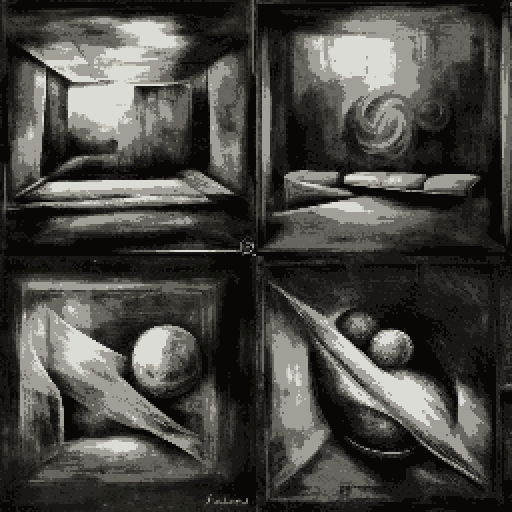

In [281]:
pil_img = Image.open('../raw_data/mj_background.png')
img = pil_img.quantize(colors=32, method=2).resize((256, 256), Image.LANCZOS).resize((512, 512), Image.LANCZOS)
img

In [282]:
img.save('../raw_data/latent_space_background_32bit.png')

In [7]:
def simplify_image(pil_img, num_colors = 8, size = (256, 256)):

    img = pil_img.quantize(colors=num_colors, method=2)
    
    sq_img = square_image(img).resize(size, Image.LANCZOS)
    
    return sq_img

In [8]:
#!mkdir ../raw_data/images_simple

In [352]:
pil_img = Image.open('../raw_data/latent_space_background_32bit.png')

img = simplify_image(pil_img, num_colors = 8, size = (128, 128))

In [353]:
# img.save('../raw_data/latent_space_background_256bit.png')

In [9]:
import numpy as np

In [19]:
def add_border(old_img, width = 6):
    img_arr = np.array(old_img)

    old_size = old_img.size
    
    new_size = [size + width for size in old_size]

    #new_size = (800, 800)
    new_img = Image.new("RGB", new_size, 'White')
    box = tuple((n - o) // 2 for n, o in zip(new_size, old_size))
    new_img.paste(old_img, box)
    
    return new_img

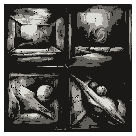

In [360]:
add_border(img, width = 8)

In [21]:
!mkdir ../raw_data/artist_images_semisimple/

In [22]:
import os
from tqdm import tqdm
for file_name in tqdm(os.listdir("../raw_data/artist_images")):
    if file_name.endswith('.png'):
        pil_img = Image.open(f"../raw_data/artist_images/{file_name}")
        simp_img = simplify_image(pil_img, num_colors = 256, size = (240, 240))
        border_img = add_border(simp_img, width = 8)
        border_img.save(f"../raw_data/artist_images_semisimple/{file_name}")

100%|█████████████████████████████████████████| 480/480 [00:30<00:00, 15.62it/s]


### choose less images and reduce the scale of the json